<a href="https://colab.research.google.com/github/Bilal-Mohammed98/My-first-project/blob/main/Mutation_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cyvcf2

In [1]:
from cyvcf2 import VCF
import pandas as pd

In [3]:
!wget https://pf8-release.cog.sanger.ac.uk/vcf/Pf3D7_MIT_v3.filt.vcf.gz.tbi

--2025-09-22 16:02:38--  https://pf8-release.cog.sanger.ac.uk/vcf/Pf3D7_MIT_v3.filt.vcf.gz.tbi
Resolving pf8-release.cog.sanger.ac.uk (pf8-release.cog.sanger.ac.uk)... 193.62.203.63, 193.62.203.61, 193.62.203.62
Connecting to pf8-release.cog.sanger.ac.uk (pf8-release.cog.sanger.ac.uk)|193.62.203.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125 [application/octet-stream]
Saving to: ‘Pf3D7_MIT_v3.filt.vcf.gz.tbi’

Pf3D7_MIT_v3.filt.v 100%[===================>]     125  --.-KB/s    in 0s      

2025-09-22 16:02:39 (40.3 MB/s) - ‘Pf3D7_MIT_v3.filt.vcf.gz.tbi’ saved [125/125]



In [6]:
!wget https://pf8-release.cog.sanger.ac.uk/vcf/Pf3D7_MIT_v3.filt.vcf.gz

--2025-09-22 16:04:48--  https://pf8-release.cog.sanger.ac.uk/vcf/Pf3D7_MIT_v3.filt.vcf.gz
Resolving pf8-release.cog.sanger.ac.uk (pf8-release.cog.sanger.ac.uk)... 193.62.203.63, 193.62.203.61, 193.62.203.62
Connecting to pf8-release.cog.sanger.ac.uk (pf8-release.cog.sanger.ac.uk)|193.62.203.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302701419 (289M) [application/gzip]
Saving to: ‘Pf3D7_MIT_v3.filt.vcf.gz’

Pf3D7_MIT_v3.filt.v 100%[===================>] 288.68M  26.2MB/s    in 12s     

2025-09-22 16:05:01 (24.2 MB/s) - ‘Pf3D7_MIT_v3.filt.vcf.gz’ saved [302701419/302701419]



In [56]:
from cyvcf2 import VCF
import pandas as pd

vcf_file= 'Pf3D7_MIT_v3.filt.vcf.gz'     #read the file directly using the files link
vcf = VCF(vcf_file)

records=[]                            #list(records) where data will be stored

for variant in vcf:                    #loop through each variant in the vcf file and return:
    chrom = variant.CHROM              #chromosome
    pos = variant.POS                  #position of the chromosome
    ref = variant.REF                  #the reference allele
    # Check if there is at least one alternative allele before accessing index 0
    if variant.ALT:
        alt = variant.ALT[0]  # take the first alternative allele
    else:
        alt = None  # Or some other placeholder to indicate no alternative allele
    qual= variant.QUAL       #Quality

    records.append([chrom, pos, ref, alt, qual])

#convert to dataframe and assign column names
df=pd.DataFrame(records, columns=["Chromosme","Position", "Ref","Alt", "Quality"])
print(df.head())           #print the first 5 data


      Chromosme  Position Ref Alt       Quality
0  Pf3D7_MIT_v3        19   A   T  29036.199219
1  Pf3D7_MIT_v3        20   A   G   1339.400024
2  Pf3D7_MIT_v3        22   G   A    262.980011
3  Pf3D7_MIT_v3        29   A   G     33.939999
4  Pf3D7_MIT_v3        30   A   G    105.879997


In [57]:
def get_mutation_type(ref, alt):             #define a function "get_mutation_type"
  if alt is None:
      return "No_Call"
  if len(ref) == 1 and len(alt) == 1:
    return "SNP"
  elif len(ref) > len(alt):
    return "Deletion"
  elif len(ref) < len(alt):
    return "Insertion"
  else:
    return "Complex"

df['Mutation_Type'] = df.apply(lambda row: get_mutation_type(row['Ref'], row['Alt']), axis=1) #create a new column

In [38]:
df

,Chromosme,Position,Ref,Alt,Quality,Mutation_Type
0,Pf3D7_MIT_v3,19,A,T,29036.199219,SNP
1,Pf3D7_MIT_v3,20,A,G,1339.400024,SNP
2,Pf3D7_MIT_v3,22,G,A,262.980011,SNP
3,Pf3D7_MIT_v3,29,A,G,33.939999,SNP
4,Pf3D7_MIT_v3,30,A,G,105.879997,SNP
...,...,...,...,...,...,...
2575,Pf3D7_MIT_v3,5960,T,C,317138.000000,SNP
2576,Pf3D7_MIT_v3,5961,T,A,76597.203125,SNP
2577,Pf3D7_MIT_v3,5962,A,G,191317.000000,SNP
2578,Pf3D7_MIT_v3,5963,T,G,79478.398438,SNP


In [40]:
df.head(20)                 #Filter the first 20 values/data

,Chromosme,Position,Ref,Alt,Quality,Mutation_Type
0,Pf3D7_MIT_v3,19,A,T,2.903620e+04,SNP
1,Pf3D7_MIT_v3,20,A,G,1.339400e+03,SNP
2,Pf3D7_MIT_v3,22,G,A,2.629800e+02,SNP
3,Pf3D7_MIT_v3,29,A,G,3.394000e+01,SNP
4,Pf3D7_MIT_v3,30,A,G,1.058800e+02,SNP
5,Pf3D7_MIT_v3,31,T,C,1.108900e+02,SNP
6,Pf3D7_MIT_v3,33,T,A,7.088850e+05,SNP
7,Pf3D7_MIT_v3,36,A,G,7.206020e+05,SNP
8,Pf3D7_MIT_v3,46,C,T,1.161300e+02,SNP
9,Pf3D7_MIT_v3,51,C,T,1.160800e+02,SNP


In [41]:
display(df.head())

,Chromosme,Position,Ref,Alt,Quality,Mutation_Type
0,Pf3D7_MIT_v3,19,A,T,29036.199219,SNP
1,Pf3D7_MIT_v3,20,A,G,1339.400024,SNP
2,Pf3D7_MIT_v3,22,G,A,262.980011,SNP
3,Pf3D7_MIT_v3,29,A,G,33.939999,SNP
4,Pf3D7_MIT_v3,30,A,G,105.879997,SNP


In [42]:
df.shape           #Give the shape of the data

(2580, 6)

In [43]:
df.describe         #describe the data

<bound method NDFrame.describe of          Chromosme  Position Ref Alt        Quality Mutation_Type
0     Pf3D7_MIT_v3        19   A   T   29036.199219           SNP
1     Pf3D7_MIT_v3        20   A   G    1339.400024           SNP
2     Pf3D7_MIT_v3        22   G   A     262.980011           SNP
3     Pf3D7_MIT_v3        29   A   G      33.939999           SNP
4     Pf3D7_MIT_v3        30   A   G     105.879997           SNP
...            ...       ...  ..  ..            ...           ...
2575  Pf3D7_MIT_v3      5960   T   C  317138.000000           SNP
2576  Pf3D7_MIT_v3      5961   T   A   76597.203125           SNP
2577  Pf3D7_MIT_v3      5962   A   G  191317.000000           SNP
2578  Pf3D7_MIT_v3      5963   T   G   79478.398438           SNP
2579  Pf3D7_MIT_v3      5964   A   G  305431.000000           SNP

[2580 rows x 6 columns]>

In [44]:
#find all null values
df.isnull().sum()

,0
Chromosme,0
Position,0
Ref,0
Alt,0
Quality,0
Mutation_Type,0


In [46]:
#Datatypes
df.dtypes

,0
Chromosme,object
Position,int64
Ref,object
Alt,object
Quality,float64
Mutation_Type,object


In [47]:
#Datasize
df.size

15480

In [48]:
df

,Chromosme,Position,Ref,Alt,Quality,Mutation_Type
0,Pf3D7_MIT_v3,19,A,T,29036.199219,SNP
1,Pf3D7_MIT_v3,20,A,G,1339.400024,SNP
2,Pf3D7_MIT_v3,22,G,A,262.980011,SNP
3,Pf3D7_MIT_v3,29,A,G,33.939999,SNP
4,Pf3D7_MIT_v3,30,A,G,105.879997,SNP
...,...,...,...,...,...,...
2575,Pf3D7_MIT_v3,5960,T,C,317138.000000,SNP
2576,Pf3D7_MIT_v3,5961,T,A,76597.203125,SNP
2577,Pf3D7_MIT_v3,5962,A,G,191317.000000,SNP
2578,Pf3D7_MIT_v3,5963,T,G,79478.398438,SNP


In [49]:
snp_count=df['Chromosme'].value_counts().sort_index()

print(f"SNP_Count\n:",snp_count)

SNP_Count
: Chromosme
Pf3D7_MIT_v3    2580
Name: count, dtype: int64


In [50]:
#filter by quality

filtered=df[df['Quality']>1000]
print(filtered)

         Chromosme  Position Ref Alt        Quality Mutation_Type
0     Pf3D7_MIT_v3        19   A   T   29036.199219           SNP
1     Pf3D7_MIT_v3        20   A   G    1339.400024           SNP
6     Pf3D7_MIT_v3        33   T   A  708885.000000           SNP
7     Pf3D7_MIT_v3        36   A   G  720602.000000           SNP
11    Pf3D7_MIT_v3        57   C   T  253825.000000           SNP
...            ...       ...  ..  ..            ...           ...
2575  Pf3D7_MIT_v3      5960   T   C  317138.000000           SNP
2576  Pf3D7_MIT_v3      5961   T   A   76597.203125           SNP
2577  Pf3D7_MIT_v3      5962   A   G  191317.000000           SNP
2578  Pf3D7_MIT_v3      5963   T   G   79478.398438           SNP
2579  Pf3D7_MIT_v3      5964   A   G  305431.000000           SNP

[1814 rows x 6 columns]


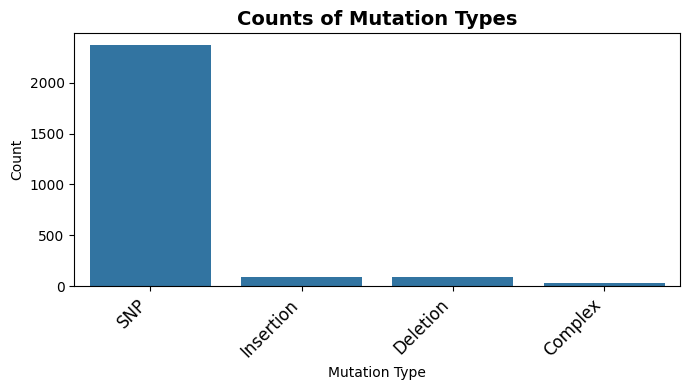

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Mutation_Type")
plt.xticks(rotation=45, ha="right", fontsize=12)   #xlabel rotation
plt.title("Counts of Mutation Types", fontweight="bold", fontsize=14) # title
plt.xlabel("Mutation Type")
plt.ylabel("Count")



plt.tight_layout()
plt.show()